<Body>   
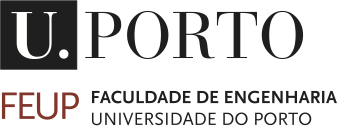   
<h1> <b>Master Thesis - Vision-based Smart Sprayer for Precision Farming </b> </h1>
<p><b>João Henrique Torres Santos, Thaidy Deguchi </b> up201802575@edu.fe.up.pt </p>
<p>Department of Electrical and Computer Engineering</p>
</Body>  
FEUP

---

## **1.Training and Testing**

 The main objective of this part was to develop a perception algorithm to identify and segment grapes in a vineyard. After the grape localization, the code must command the hardware to point the spray in the grape direction. The hardware will also point a laser to the fruit. The code must segment the laser color from the image to validate the grape position. After all these steps, the hardware must perform the spray action only in the grapes.

The dataset used can be found in the following link: \url{http://bit.ly/42cDU1N}. 

This notebook was taken and modified from the example template present https://github.com/ultralytics/yolov5/wiki/Train-Custom-Data last accessed at (2023/03/10). 

# Step 1: Install Requirements

In [ ]:
#clone YOLOv5 and 
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
%pip install -qr requirements.txt # install dependencies
%pip install -q roboflow

import torch
import os
from IPython.display import Image, clear_output  # to display images

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Cloning into 'yolov5'...
remote: Enumerating objects: 15300, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 15300 (delta 4), reused 2 (delta 0), pack-reused 15287
Receiving objects: 100% (15300/15300), 14.20 MiB | 13.73 MiB/s, done.
Resolving deltas: 100% (10493/10493), done.
/content/yolov5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 KB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 29.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 2.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.9.0 requires jedi>=0.10, which is not installed.
cvxpy 1.2.3 requires setuptools<=64.0.2, but you have setuptools 67.6.0 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 KB 4.4 MB/s et

# Step 2: Mount Google Drive

The following commands mount the google drive and import the dataset.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!unzip /content/drive/MyDrive/Master_Thesis/grape.zip -d /content/data

Streaming output truncated to the last 5000 lines.
  inflating: /content/data/Grape bunch detector_2.v8i.yolov5pytorch/train/labels/aveleda_23_06_2021_237_jpg.rf.46295566044994fea3982c484deff695.txt  
  inflating: /content/data/Grape bunch detector_2.v8i.yolov5pytorch/train/labels/aveleda_23_06_2021_241_jpg.rf.23b450a8663252c6618ca9059117e58c.txt  
  inflating: /content/data/Grape bunch detector_2.v8i.yolov5pytorch/train/labels/aveleda_23_06_2021_241_jpg.rf.37a7daf6307b21a03d034a25f5e8daee.txt  
  inflating: /content/data/Grape bunch detector_2.v8i.yolov5pytorch/train/labels/aveleda_23_06_2021_249_jpg.rf.19dffd374d7f878fc3b1080f31591959.txt  
  inflating: /content/data/Grape bunch detector_2.v8i.yolov5pytorch/train/labels/aveleda_23_06_2021_249_jpg.rf.8a5152cf70294c61fb1a4959a3fe4ce4.txt  
  inflating: /content/data/Grape bunch detector_2.v8i.yolov5pytorch/train/labels/aveleda_23_06_2021_250_jpg.rf.1ba06efbe1d941a82610ab2e8fcaaa59.txt  
  inflating: /content/data/Grape bunch detector_2

# Step 3: Train Our Custom YOLOv5 model


**For initial training:**

Here, we are able to pass a number of arguments:
- **img:** define input image size
- **batch:** determine batch size
- **epochs:** define the number of training epochs.
- **data:** Our dataset location is saved in the `dataset.location`
- **weights:** specify a path to weights to start transfer learning from.
- **cache:** cache images for faster training
- **project:** save each epoch in the desired path (gdrive in this case)
- **name:** assign a name to the Run folder 

**For resume training:**

If there is a need to stop the training and continue later, it is possible to use checkpoints.

- **resume:** path to where the last trained epoch is saved.



In [ ]:
!python train.py --img 1280 --batch 16 --epochs 150 --data /content/yolov5/data/data.yaml --weights yolov5l.pt --freeze 10 --project "/content/drive/MyDrive/Runs"  --name Run_Fusion 

In [ ]:
!python train.py --resume "/content/drive/MyDrive/Runs/Run_Fusion/weights/last.pt"

train: weights=yolov5s.pt, cfg=, data=data/coco128.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=640, rect=False, resume=/content/drive/MyDrive/Runs/Run_Fusion/weights/last.pt, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-119-g5543b89 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_

#Run Inference  With Trained Weights
Run inference with a pretrained checkpoint on contents of `test/images` folder downloaded from Roboflow.

In [ ]:
!python val.py --weights /content/drive/MyDrive/Runs/Run_Fusion/weights/best.pt  --data /content/yolov5/data/data.yaml --img 1280

detect: weights=['runs/train/exp/weights/best.pt'], source=/content/datasets/American-Mushrooms-1/test/images, imgsz=[416, 416], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False
YOLOv5 🚀 v5.0-471-g2993c3f torch 1.9.0+cu102 CUDA:0 (Tesla P100-PCIE-16GB, 16280.875MB)

Fusing layers... 
Model Summary: 224 layers, 7056607 parameters, 0 gradients, 16.3 GFLOPs
image 1/5 /content/datasets/American-Mushrooms-1/test/images/chanterelle_02_jpg.rf.a75f69cbc359b824bb7ab938aae0f78c.jpg: 416x416 4 chanterelles, Done. (0.006s)
image 2/5 /content/datasets/American-Mushrooms-1/test/images/chanterelle_03_jpg.rf.846e06d86f791840504a794757a1d309.jpg: 416x416 2 chanterelles, Done. (0.006s)
image 3/5 /content/datasets/American-Mushroom

# Conclusion 

The model is saved on gdrive, the followinig code download the detect images folder. 

In [ ]:
#export your model's weights for future use
from google.colab import files
!zip -r /content/file.zip /content/yolov5/runs/detect/exp
files.download('./runs/train/exp/weights/best.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>